In [28]:
import zipfile
from scipy.io import arff
import io

# ZIP-Datei öffnen
with zipfile.ZipFile(r"C:\Users\Ulaha\Downloads\autistic+spectrum+disorder+screening+data+for+children.zip", 'r') as zip_ref:
    # Annahme: Die ARFF-Datei hat den gleichen Namen wie die ZIP-Datei, nur mit .arff-Erweiterung
    arff_filename = zip_ref.namelist()[0]  # Nimmt die erste Datei in der ZIP
    with zip_ref.open(arff_filename) as arff_file:
        # ARFF-Datei aus dem ZIP-Archiv lesen
        data, meta = arff.loadarff(io.StringIO(arff_file.read().decode('utf-8')))

# Jetzt können Sie mit data und meta arbeiten

In [29]:
print("Daten geladen:", data is not None)
print("Metadaten geladen:", meta is not None)

Daten geladen: True
Metadaten geladen: True


In [30]:
import zipfile
from scipy.io import arff
import io
import pandas as pd

with zipfile.ZipFile(r"C:\Users\Ulaha\Downloads\autistic+spectrum+disorder+screening+data+for+children.zip", 'r') as zip_ref:
    arff_files = [f for f in zip_ref.namelist() if f.endswith('.arff')]
    if arff_files:
        arff_filename = arff_files[0]
        print(f"ARFF-Datei gefunden: {arff_filename}")
        with zip_ref.open(arff_filename) as arff_file:
            data, meta = arff.loadarff(io.StringIO(arff_file.read().decode('utf-8')))
            
            df = pd.DataFrame(data)
            string_columns = df.select_dtypes([object]).columns
            df[string_columns] = df[string_columns].apply(lambda x: x.str.decode('utf-8'))
            
            print("\nErste 5 Zeilen des DataFrames:")
            print(df.head())
            
            print("\nInformationen über das DataFrame:")
            print(df.info())
    else:
        print("Keine ARFF-Datei in der ZIP-Datei gefunden.")

ARFF-Datei gefunden: Autism-Child-Data.arff

Erste 5 Zeilen des DataFrames:
  A1_Score A2_Score A3_Score A4_Score A5_Score A6_Score A7_Score A8_Score  \
0        1        1        0        0        1        1        0        1   
1        1        1        0        0        1        1        0        1   
2        1        1        0        0        0        1        1        1   
3        0        1        0        0        1        1        0        0   
4        1        1        1        1        1        1        1        1   

  A9_Score A10_Score  ...  gender        ethnicity jundice austim  \
0        0         0  ...       m           Others      no     no   
1        0         0  ...       m  Middle Eastern       no     no   
2        0         0  ...       m                ?      no     no   
3        0         1  ...       f                ?     yes     no   
4        1         1  ...       m           Others     yes     no   

   contry_of_res used_app_before result    age

In [31]:
import numpy as np
import pandas as pd  # Falls Sie pandas noch nicht importiert haben

# Rest Ihres Codes...
print(df.isnull().sum())

# Ersetzen Sie '?' mit NaN
df = df.replace('?', np.nan)

# Behandeln Sie fehlende Werte
df = df.dropna()  # oder df = df.fillna(method='ffill')

A1_Score           0
A2_Score           0
A3_Score           0
A4_Score           0
A5_Score           0
A6_Score           0
A7_Score           0
A8_Score           0
A9_Score           0
A10_Score          0
age                4
gender             0
ethnicity          0
jundice            0
austim             0
contry_of_res      0
used_app_before    0
result             0
age_desc           0
relation           0
Class/ASD          0
dtype: int64


In [32]:
# Statistische Zusammenfassung
print(df.describe())

# Verteilung der Zielvariable
print(df['Class/ASD'].value_counts(normalize=True))

# Korrelation zwischen numerischen Variablen
print(df[['age', 'result']].corr())

              age      result
count  248.000000  248.000000
mean     6.427419    6.366935
std      2.386444    2.342711
min      4.000000    0.000000
25%      4.000000    5.000000
50%      6.000000    7.000000
75%      8.000000    8.000000
max     11.000000   10.000000
Class/ASD
YES    0.508065
NO     0.491935
Name: proportion, dtype: float64
             age    result
age     1.000000  0.063802
result  0.063802  1.000000


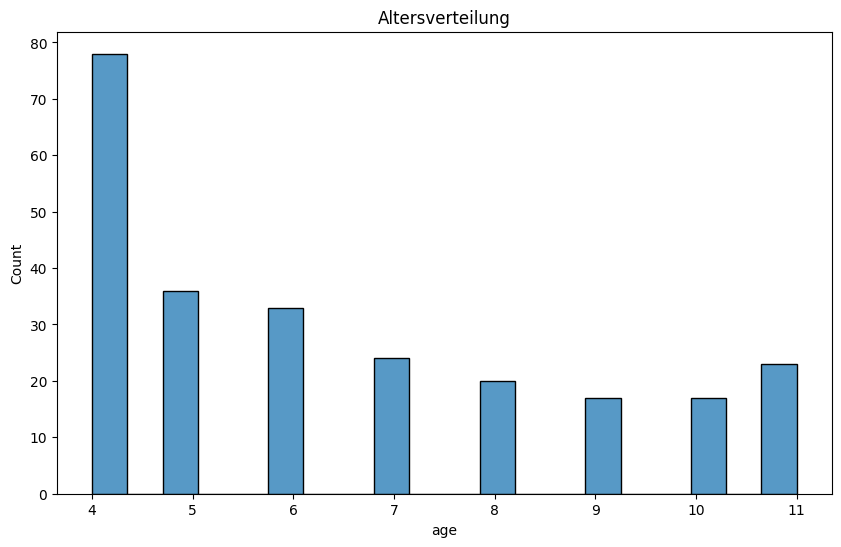

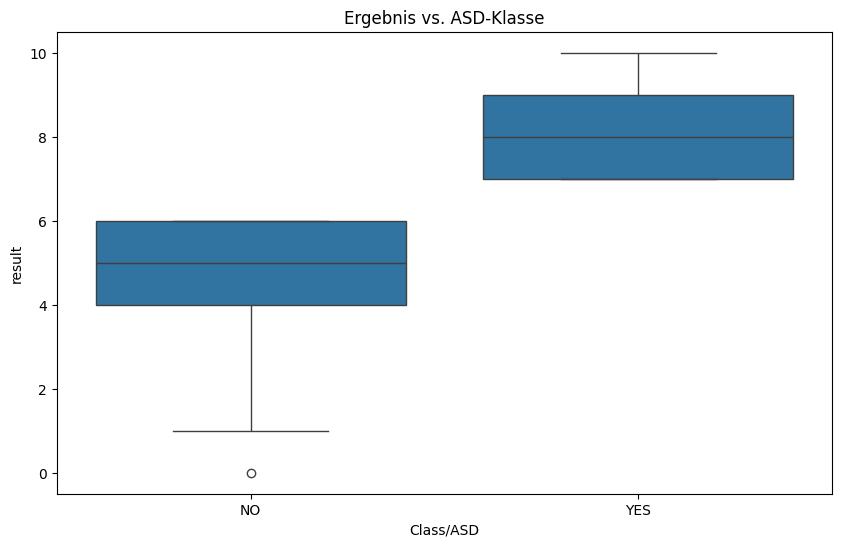

In [33]:
import matplotlib.pyplot as plt
import seaborn as sns

# Altersverteilung
plt.figure(figsize=(10,6))
sns.histplot(df['age'], bins=20)
plt.title('Altersverteilung')
plt.show()

# Boxplot: Ergebnis vs. ASD-Klasse
plt.figure(figsize=(10,6))
sns.boxplot(x='Class/ASD', y='result', data=df)
plt.title('Ergebnis vs. ASD-Klasse')
plt.show()

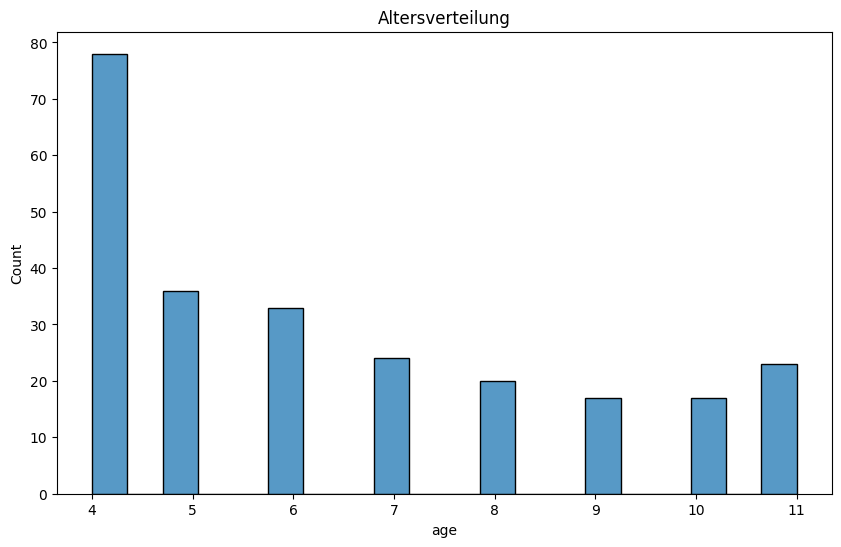

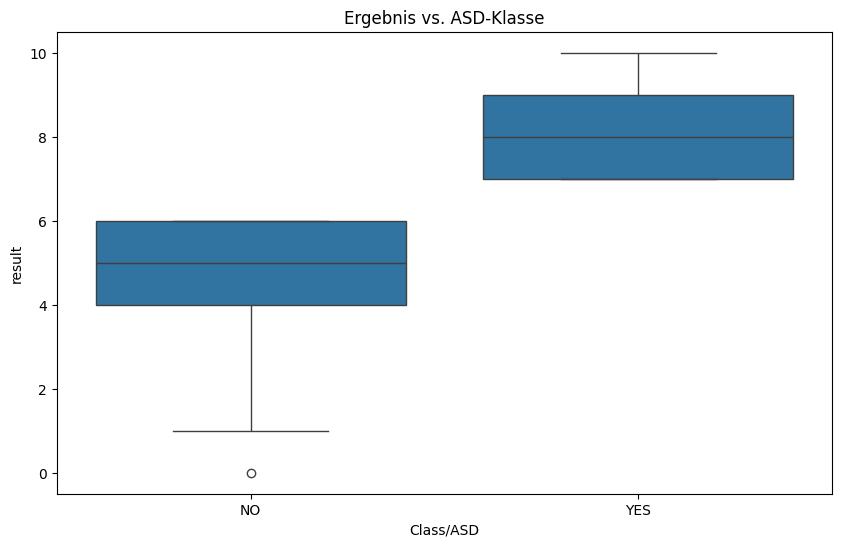

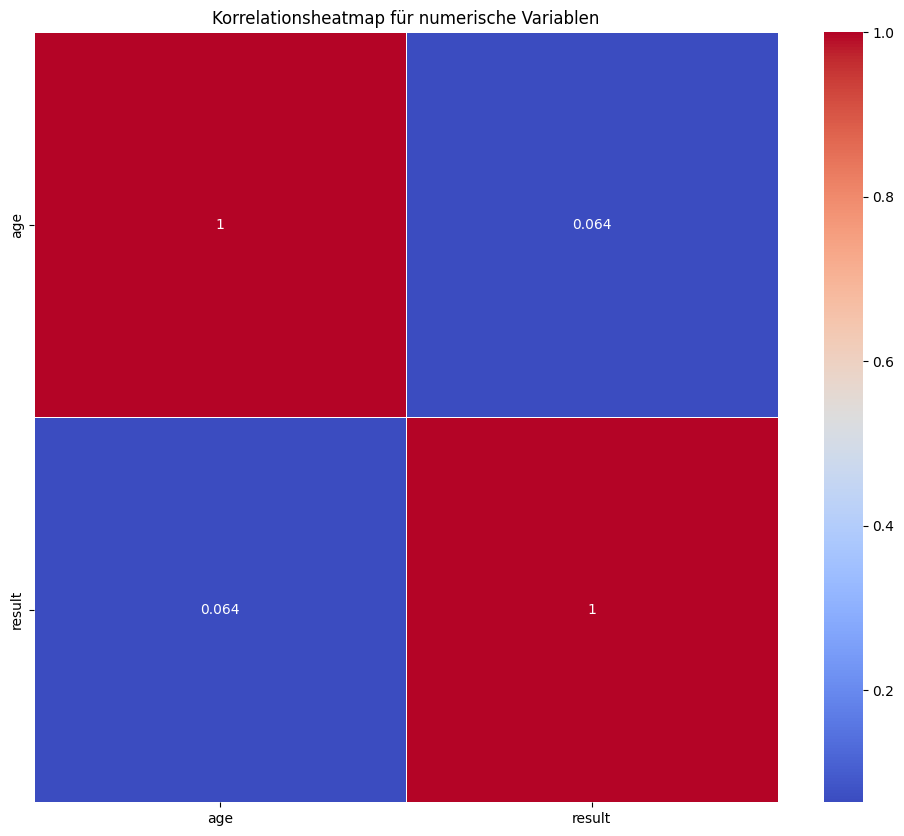

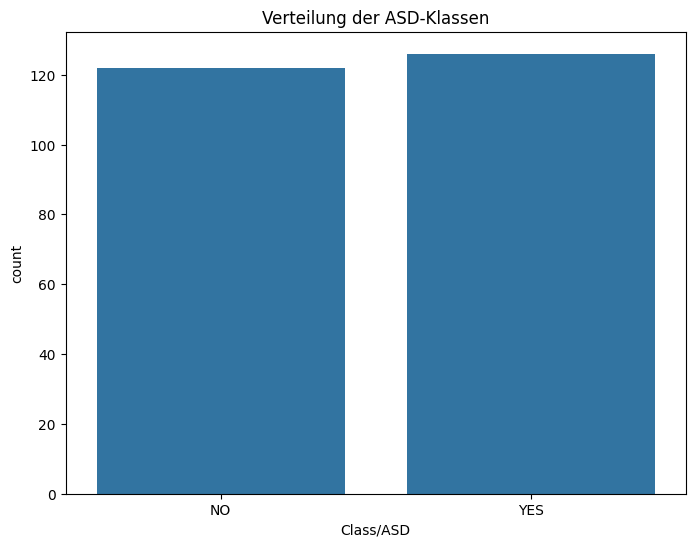

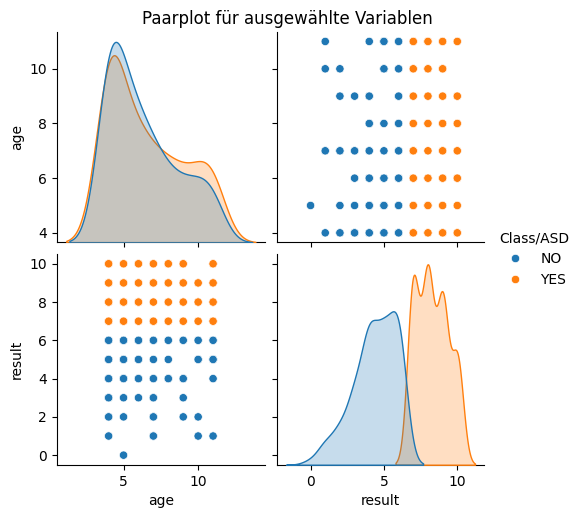

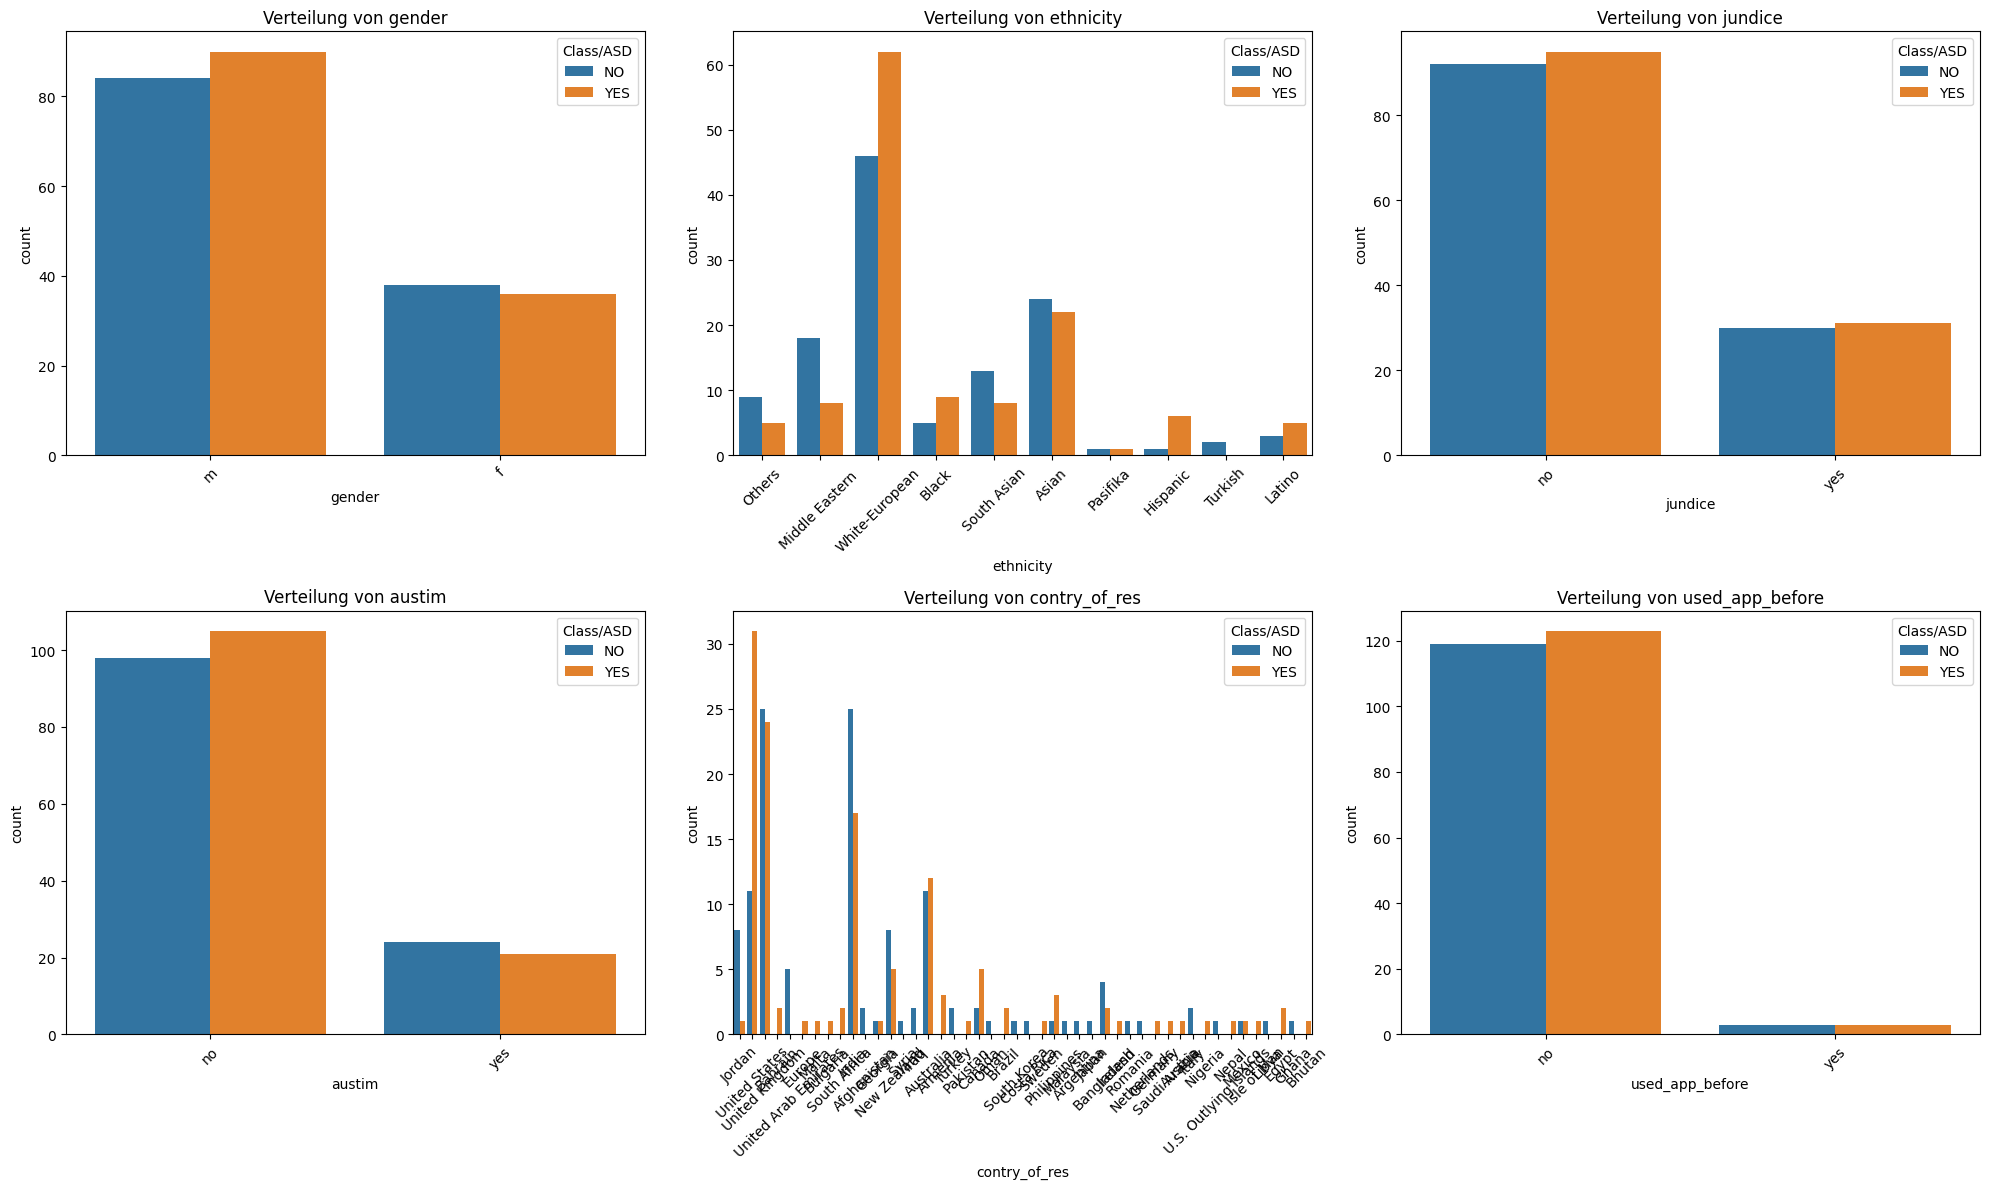

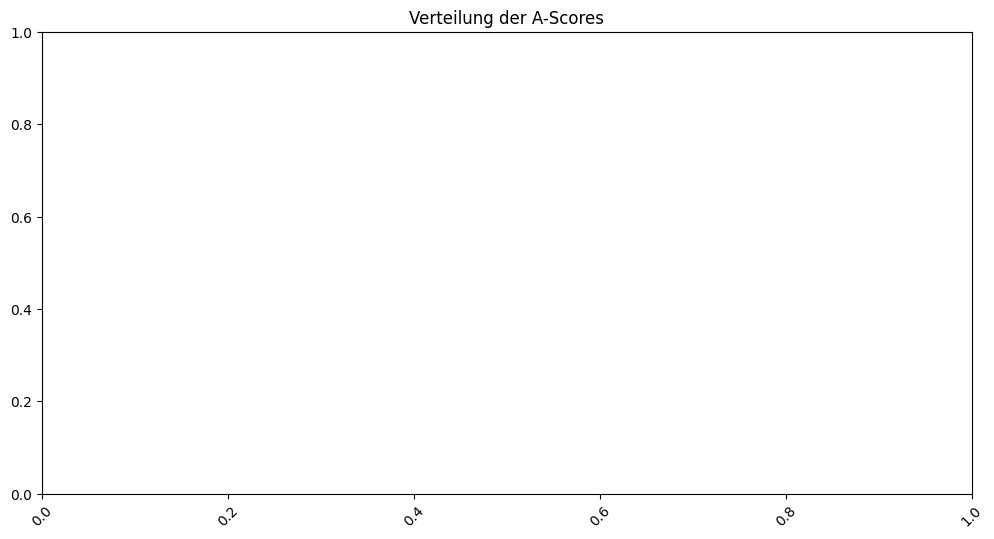

In [34]:
import matplotlib.pyplot as plt
import seaborn as sns

# Altersverteilung
plt.figure(figsize=(10,6))
sns.histplot(df['age'], bins=20)
plt.title('Altersverteilung')
plt.show()

# Boxplot: Ergebnis vs. ASD-Klasse
plt.figure(figsize=(10,6))
sns.boxplot(x='Class/ASD', y='result', data=df)
plt.title('Ergebnis vs. ASD-Klasse')
plt.show()

# Korrelationsheatmap für numerische Variablen
numeric_columns = df.select_dtypes(include=[np.number]).columns
correlation_matrix = df[numeric_columns].corr()
plt.figure(figsize=(12, 10))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Korrelationsheatmap für numerische Variablen')
plt.show()

# Verteilung der ASD-Klassen
plt.figure(figsize=(8, 6))
sns.countplot(x='Class/ASD', data=df)
plt.title('Verteilung der ASD-Klassen')
plt.show()

# Paarplot für ausgewählte Variablen
selected_columns = ['age', 'result', 'A1_Score', 'A5_Score', 'A10_Score', 'Class/ASD']
sns.pairplot(df[selected_columns], hue='Class/ASD')
plt.suptitle('Paarplot für ausgewählte Variablen', y=1.02)
plt.show()

# Balkendiagramm für kategorische Variablen
categorical_columns = ['gender', 'ethnicity', 'jundice', 'austim', 'contry_of_res', 'used_app_before']
fig, axes = plt.subplots(2, 3, figsize=(20, 12))
axes = axes.flatten()

for i, col in enumerate(categorical_columns):
    sns.countplot(x=col, hue='Class/ASD', data=df, ax=axes[i])
    axes[i].set_title(f'Verteilung von {col}')
    axes[i].tick_params(axis='x', rotation=45)

plt.tight_layout()
plt.show()

# Analyse der A-Scores
a_scores = ['A1_Score', 'A2_Score', 'A3_Score', 'A4_Score', 'A5_Score', 
            'A6_Score', 'A7_Score', 'A8_Score', 'A9_Score', 'A10_Score']

plt.figure(figsize=(12, 6))
sns.boxplot(data=df[a_scores])
plt.title('Verteilung der A-Scores')
plt.xticks(rotation=45)
plt.show()

In [35]:
# 4. Vorbereitung der Daten für das Modell
X = df_encoded.drop('Class/ASD', axis=1)
y = df_encoded['Class/ASD']

# Aufteilen in Trainings- und Testdaten
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Skalierung der Daten
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# 5. Modell trainieren
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
rf_model.fit(X_train_scaled, y_train)

# 6. Modell evaluieren
y_pred = rf_model.predict(X_test_scaled)

print("Classification Report:")
print(classification_report(y_test, y_pred))

print("\nConfusion Matrix:")
print(confusion_matrix(y_test, y_pred))

# 7. Feature Importance visualisieren
feature_importance = pd.DataFrame({
    'feature': X.columns,
    'importance': rf_model.feature_importances_
}).sort_values('importance', ascending=False)

plt.figure(figsize=(10,6))
sns.barplot(x='importance', y='feature', data=feature_importance.head(10))
plt.title('Top 10 wichtigste Features')
plt.tight_layout()
plt.show()

# 8. Beispiel für eine Vorhersage
# Nehmen wir an, wir haben einen neuen Datenpunkt
new_data = X_test.iloc[0].to_frame().T  # Nehmen Sie einfach den ersten Testdatenpunkt als Beispiel

# Skalieren Sie die neuen Daten
new_data_scaled = scaler.transform(new_data)

# Machen Sie eine Vorhersage
prediction = rf_model.predict(new_data_scaled)
prediction_proba = rf_model.predict_proba(new_data_scaled)

print("\nVorhersage für den neuen Datenpunkt:")
print("Klasse:", prediction[0])
print("Wahrscheinlichkeit (Nein, Ja):", prediction_proba[0])


NameError: name 'df_encoded' is not defined

In [8]:
pip install ucimlrepo

Note: you may need to restart the kernel to use updated packages.


In [9]:
from ucimlrepo import fetch_ucirepo 
  
# fetch dataset 
autistic_spectrum_disorder_screening_data_for_children = fetch_ucirepo(id=419) 
  
# data (as pandas dataframes) 
X = autistic_spectrum_disorder_screening_data_for_children.data.features 
y = autistic_spectrum_disorder_screening_data_for_children.data.targets 
  
# metadata 
print(autistic_spectrum_disorder_screening_data_for_children.metadata) 
  
# variable information 
print(autistic_spectrum_disorder_screening_data_for_children.variables) 


{'uci_id': 419, 'name': 'Autistic Spectrum Disorder Screening Data for Children  ', 'repository_url': 'https://archive.ics.uci.edu/dataset/419/autistic+spectrum+disorder+screening+data+for+children', 'data_url': 'https://archive.ics.uci.edu/static/public/419/data.csv', 'abstract': 'Children screening data for autism suitable for classification and predictive tasks ', 'area': 'Health and Medicine', 'tasks': ['Classification'], 'characteristics': ['Multivariate'], 'num_instances': 292, 'num_features': 20, 'feature_types': ['Integer'], 'demographics': ['\x00', 'Age', 'Gender', 'Ethnicity', 'Nationality'], 'target_col': ['class'], 'index_col': None, 'has_missing_values': 'yes', 'missing_values_symbol': 'NaN', 'year_of_dataset_creation': 2017, 'last_updated': 'Wed Apr 03 2024', 'dataset_doi': '10.24432/C5659W', 'creators': ['Fadi Thabtah'], 'intro_paper': None, 'additional_info': {'summary': "see attached file for variables' description ", 'purpose': None, 'funded_by': None, 'instances_repr

In [16]:
# Anzeige der Spaltennamen und Datentypen
print(df.columns)
print(df.describe())

Index(['A1_Score', 'A2_Score', 'A3_Score', 'A4_Score', 'A5_Score', 'A6_Score',
       'A7_Score', 'A8_Score', 'A9_Score', 'A10_Score', 'age', 'gender',
       'ethnicity', 'jundice', 'austim', 'contry_of_res', 'used_app_before',
       'result', 'age_desc', 'relation', 'Class/ASD'],
      dtype='object')
              age      result
count  248.000000  248.000000
mean     6.427419    6.366935
std      2.386444    2.342711
min      4.000000    0.000000
25%      4.000000    5.000000
50%      6.000000    7.000000
75%      8.000000    8.000000
max     11.000000   10.000000


In [18]:
# Beispiel: Umwandeln von Score-Spalten in numerische Werte
score_columns = ['A1_Score', 'A2_Score', 'A3_Score', 'A4_Score', 'A5_Score', 
                 'A6_Score', 'A7_Score', 'A8_Score', 'A9_Score', 'A10_Score']

for col in score_columns:
    df[col] = pd.to_numeric(df[col], errors='coerce')  # Fehlerhafte Konvertierungen werden zu NaN

In [21]:
# Umwandlung von Score-Spalten in numerische Werte
score_columns = ['A1_Score', 'A2_Score', 'A3_Score', 'A4_Score', 'A5_Score', 
                 'A6_Score', 'A7_Score', 'A8_Score', 'A9_Score', 'A10_Score']

for col in score_columns:
    df[col] = pd.to_numeric(df[col], errors='coerce')  # Fehlerhafte Konvertierungen werden zu NaN

# Überprüfen Sie den Namen der Geschlechtsspalte und passen Sie ihn an
if 'Gender' in df.columns:
    df['Gender'] = df['Gender'].map({'Male': 0, 'Female': 1})
elif 'gender' in df.columns:  # Kleinbuchstaben prüfen
    df['gender'] = df['gender'].map({'Male': 0, 'Female': 1})
else:
    print("Keine Geschlechtsspalte gefunden!")

# Umwandlung von Altersgruppen in numerische Werte (falls vorhanden)
if 'Age' in df.columns:
    df['Age'] = df['Age'].map({'4-11 years': 0, '12-17 years': 1})

# Überprüfen auf fehlende Werte
missing_values = df.isnull().sum()
print(missing_values[missing_values > 0])  # Nur Spalten mit fehlenden Werten anzeigen

# Median-Imputation für numerische Spalten
df.fillna(df.median(numeric_only=True), inplace=True)

print("Daten nach der Behandlung fehlender Werte:")
print(df.head())



gender    248
dtype: int64
Daten nach der Behandlung fehlender Werte:
   A1_Score  A2_Score  A3_Score  A4_Score  A5_Score  A6_Score  A7_Score  \
0         1         1         0         0         1         1         0   
1         1         1         0         0         1         1         0   
4         1         1         1         1         1         1         1   
6         1         0         1         1         1         1         0   
7         1         1         1         1         1         1         1   

   A8_Score  A9_Score  A10_Score  ...  gender        ethnicity jundice austim  \
0         1         0          0  ...     NaN           Others      no     no   
1         1         0          0  ...     NaN  Middle Eastern       no     no   
4         1         1          1  ...     NaN           Others     yes     no   
6         1         0          1  ...     NaN   White-European      no     no   
7         1         0          0  ...     NaN  Middle Eastern       no    

In [25]:
for col in score_columns:
    df[col] = pd.to_numeric(df[col], errors='coerce')  # Fehlerhafte Konvertierungen werden zu NaN

# Umwandlung von Geschlecht in numerische Werte (überprüfen Sie den tatsächlichen Spaltennamen)
if 'Gender' in df.columns:
    df['Gender'] = df['Gender'].map({'Male': 0, 'Female': 1})
elif 'gender' in df.columns:  # Kleinbuchstaben prüfen
    df['gender'] = df['gender'].map({'Male': 0, 'Female': 1})

# Umwandlung von Altersgruppen in numerische Werte (falls vorhanden)
if 'Age' in df.columns:
    df['Age'] = df['Age'].map({'4-11 years': 0, '12-17 years': 1})

# Überprüfen auf fehlende Werte
missing_values = df.isnull().sum()
print(missing_values[missing_values > 0])  # Nur Spalten mit fehlenden Werten anzeigen

# Median-Imputation für numerische Spalten
df.fillna(df.median(numeric_only=True), inplace=True)

# Überprüfen der Zielvariablen
possible_target_columns = ['class', 'Class', 'target']  # Mögliche Namen für die Zielvariable
target_column = None

for col in possible_target_columns:
    if col in df.columns:
        target_column = col
        break

if target_column is None:
    print("Zielvariable nicht gefunden!")
else:
    X = df.drop(target_column, axis=1)  # Merkmale (alle außer Zielvariable)
    y = df[target_column]  # Zielvariable

    # Datenaufteilung: 80% Training, 20% Test
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

    # Modellauswahl: Random Forest Classifier verwenden
    model = RandomForestClassifier(random_state=42)

    # Modelltraining
    model.fit(X_train, y_train)

    # Vorhersagen treffen
    y_pred = model.predict(X_test)

    # Leistungsbewertung
    accuracy = accuracy_score(y_test, y_pred)
    print(f'Accuracy: {accuracy:.2f}')
    print(classification_report(y_test, y_pred))

gender    248
dtype: int64
Zielvariable nicht gefunden!


In [27]:
from sklearn.model_selection import GridSearchCV

param_grid = {
    'n_estimators': [50, 100],
    'max_depth': [None, 10, 20],
    'min_samples_split': [2, 5]
}

grid_search = GridSearchCV(estimator=model, param_grid=param_grid,
                           cv=5, scoring='accuracy')
grid_search.fit(X_train, y_train)

print(f'Beste Hyperparameter: {grid_search.best_params_}')

NameError: name 'X_train' is not defined

In [36]:
# Umwandlung von Score-Spalten in numerische Werte (falls erforderlich)
score_columns = ['A1_Score', 'A2_Score', 'A3_Score', 'A4_Score', 'A5_Score', 
                 'A6_Score', 'A7_Score', 'A8_Score', 'A9_Score', 'A10_Score']

for col in score_columns:
    df[col] = pd.to_numeric(df[col], errors='coerce')

# Umwandlung von Geschlecht in numerische Werte (überprüfen Sie den tatsächlichen Spaltennamen)
if 'Gender' in df.columns:
    df['Gender'] = df['Gender'].map({'Male': 0, 'Female': 1})
elif 'gender' in df.columns:
    df['gender'] = df['gender'].map({'Male': 0, 'Female': 1})

# Umwandlung von Altersgruppen in numerische Werte (falls vorhanden)
if 'Age' in df.columns:
    df['Age'] = df['Age'].map({'4-11 years': 0, '12-17 years': 1})

# Überprüfen auf fehlende Werte
missing_values = df.isnull().sum()
print(missing_values[missing_values > 0])  # Nur Spalten mit fehlenden Werten anzeigen

# Median-Imputation für numerische Spalten
df.fillna(df.median(numeric_only=True), inplace=True)

# Zielvariable definieren (z.B. class)
target_column = 'class' if 'class' in df.columns else ('Class' if 'Class' in df.columns else None)

if target_column is None:
    print("Zielvariable nicht gefunden!")
else:
    X = df.drop(target_column, axis=1)  # Merkmale (alle außer Zielvariable)
    y = df[target_column]  # Zielvariable

print("Daten erfolgreich vorbereitet.")

gender    248
dtype: int64
Zielvariable nicht gefunden!
Daten erfolgreich vorbereitet.


In [37]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, accuracy_score

# Datenaufteilung: 80% Training, 20% Test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Modellauswahl: Random Forest Classifier verwenden
model = RandomForestClassifier(random_state=42)

# Modelltraining
model.fit(X_train, y_train)

# Vorhersagen treffen
y_pred = model.predict(X_test)

# Leistungsbewertung
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy:.2f}')
print(classification_report(y_test, y_pred))

ValueError: could not convert string to float: 'm'